<a href="https://www.kaggle.com/code/sagarkanade721/logisticregression-titanic-survival-prediction?scriptVersionId=100923733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/titanic/train.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['PassengerId'].nunique()

891

In [9]:
#Lets drop the 'PassengerId' column as it just a unique number for each instance & it won't help us in predictions
df=df.drop('PassengerId',axis=1)

In [10]:
#Lets separate Numerical Features and Catagorical features to gets some insights:

In [11]:
df_cat=df.select_dtypes(include='object') #Categorical Dataframe

In [12]:
df_cat.head() 

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [13]:
df_num=df.select_dtypes(exclude='object') #Numerical Dataframe

In [14]:
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
#Lets check insights of features:

In [16]:
class feature_details:
    
    
    def categorical_feature_details(self,categorical_df):
        
        print("\n==================================================================")
        print("                   CATEGORICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=categorical_df.columns
    
        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________")



            #nulls
            
            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=np.round((nulls/(len(df[col])))*100,2)
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))

            uniqs=df[col].unique()
            print("\n    Unique values are:")
            for i in range(len(uniqs)):
                print('    ',i+1,'-',uniqs[i])
                
                
                
                
    def categorywise_outliers_details(self,categorical_df,target_column):
        
        df=pd.concat([categorical_df,target_column],axis=1)
        targetcol=target_column.name
        cols=df.columns
        
        
        print("\n=====================================================================")
        print("\n                   CATEGORYWISE OUTLIERS DETAILS:                    ")
        print("               (with respect to target variable: {} )               \n".format(targetcol))

        print("=====================================================================")
        
        
        for i in range(len(cols)):

            col=cols[i]

            if col==targetcol:
                continue
            else:
                print("\n\n________________")
                print("\nCOLUMN: {} ".format(col.upper()))
                print("________________")
                cats=df[col].unique()
            
            for i in range(len(cats)):
                cat=cats[i]

                print("\n\n      {}. Category: {} \n".format(i+1,cat))



                q75,q25=np.percentile(df[df[col]==cat][targetcol],[75,25])
                iqr=np.round(q75-q25,3)
                upperlim=np.round(q75+(1.5*iqr),3)
                lowerlim=np.round(q25-(1.5*iqr),3)



                upper_indexes=df[(df[col]==cat) & (df[targetcol]>upperlim)].index
                lower_indexes=df[(df[col]==cat) & (df[targetcol]<lowerlim)].index

                mini=df[df[col]==cat][targetcol].min()
                maxi=df[df[col]==cat][targetcol].max()
                avg=np.round(df[df[col]==cat][targetcol].mean(),2)
                print("                Minimum {} for {} is: {}".format(targetcol,cat,mini))
                print("                Maximum {} for {} is: {}".format(targetcol,cat,maxi))
                print("                Average {} for {} is: {}\n".format(targetcol,cat,avg))
                
                print("                Upper Limit is {}".format(upperlim))
                print("                Lower Limit is {}".format(lowerlim))
                
                
                
                if (len(upper_indexes)>0) or (len(lower_indexes)>0):

                    if len(upper_indexes)>0:
                        print("\n                  >>> HIGHER OUTLIERS: {} ".format(len(upper_indexes)))
                        print("                \nOutliers are at index nos: \n",list(upper_indexes))
                        

                    if len(lower_indexes)>0:
                        print("                  >>> LOWER OUTLIERS: {} \n".format(len(lower_indexes)))
                        print("                \nOutliers are at index nos: \n",list(lower_indexes))
                        

                else:
                    print("                  NO OUTLIERS")
                    
                    
                
            
                

                
                
    def numerical_feature_details(self,numerical_df):
        print("\n==================================================================")
        print("                   NUMERICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=numerical_df.columns

        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________\n")


            
            mins=df[col].min()
            maxs=df[col].max()
            avgs=np.round(df[col].mean(),2)
            
            print("Minimum {} is {}".format(col,mins))
            print("Maximum {} is {}".format(col,maxs))
            print("Average {} is {}".format(col,avgs))
            
            
            
            
            #nulls

            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=np.round((nulls/(len(df[col])))*100,2)
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))



            #outliers
            
            print('\nOUTLIERS:-\n')


            q75,q25=np.percentile(df[col],[75,25])
            iqr=np.round(q75-q25,3)
            upperlim=np.round(q75+(1.5*iqr),3)
            lowerlim=np.round(q25-(1.5*iqr),3)
            
            print("    25th Percentile is: ",q25)
            print("    75th Percentile is: ",q75)

            print("    Inter Quartile range is: ",iqr)

            print("    Upper limit is: ", upperlim)
            print("    Lower limit is: ", lowerlim)
                        
            print('\n')    
            print("    >>> HIGHER OUTLIERS: {} ".format(len(df[df[col]>upperlim])))
            print("    >>> LOWER OUTLIERS: {} ".format(len(df[df[col]<lowerlim])))
            print('\n\n')


            
            

       

In [17]:
feature_details=feature_details()

In [18]:
#Categorical Features details
feature_details.categorical_feature_details(df_cat)


                   CATEGORICAL FEATURE DETAILS                     


________________

Feature: Name
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 891 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 891 unique values

    Unique values are:
     1 - Braund, Mr. Owen Harris
     2 - Cumings, Mrs. John Bradley (Florence Briggs Thayer)
     3 - Heikkinen, Miss. Laina
     4 - Futrelle, Mrs. Jacques Heath (Lily May Peel)
     5 - Allen, Mr. William Henry
     6 - Moran, Mr. James
     7 - McCarthy, Mr. Timothy J
     8 - Palsson, Master. Gosta Leonard
     9 - Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
     10 - Nasser, Mrs. Nicholas (Adele Achem)
     11 - Sandstrom, Miss. Marguerite Rut
     12 - Bonnell, Miss. Elizabeth
     13 - Saundercock, Mr. William Henry
     14 - Andersson, Mr. Anders Johan
     15 - Vestrom, Miss. Hulda Amanda Adolfina
     16 - Hewlett, Mrs. (Mary D Kingcome) 
     17 - Rice, Master. Eugene
     18 - Williams, Mr

77.1 % values in 'Cabin' feature are null
    (i.e There are 687 Number of null values Out of 891 instaces)
    
0.22% values in 'Embarked' feature are null
    (i.e There are 2 Number of null values Out of 891 instaces)

In [19]:
#lets Check for nulls in 'cabin' feature:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [20]:
#filling null values with string 'Nan'
df['Cabin']=df['Cabin'].fillna('Nan')

In [21]:
#Converting feature Dtype to object
df['Cabin']=df['Cabin'].astype(str)

In [22]:
#Bringing out first initial of Cabin value as i suppose it represent Deck

decks=[]
for i in range(len(df['Cabin'])):
    if df['Cabin'][i] == 'Nan':
        continue
    else:
        decks.append(df['Cabin'][i][0])

In [23]:
#Converting values in cabin feature into initials (i.e Deck) to check survival rate by Decks 
df['Cabin']=df['Cabin'].apply(lambda x:x[0])

In [24]:
#Dataframe without Nulls
df[df['Cabin']!='N']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,C
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S


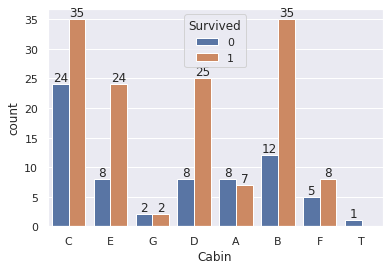

In [25]:
plt.Figure(figsize=(10,6),dpi=75)
ax=sns.countplot(data=df[df['Cabin']!='N'],x='Cabin',hue='Survived')
for i in ax.containers:
    ax.bar_label(i,)

#### Observation:

    - We dont have much information on 'Cabin' feature, still if we look at the above graph and the Cross Section 
      of Titanic. with whatever information we have it is strange to see that the majority of people who couldn't survive
      are from upperdecks i.e 'B'&'C'.
      
    - There is nothing more we can get with such small data from 'Cabin' feature, So it is better to drop this feature.

In [26]:
df_cat=df_cat.drop('Cabin',axis=1)

In [27]:
df_cat.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [28]:
#There were some null values in 'Embarked' features also, Lets check them:

df_cat[df_cat['Embarked'].isnull()]

,Name,Sex,Ticket,Embarked
61,"Icard, Miss. Amelie",female,113572,NaN
829,"Stone, Mrs. George Nelson (Martha Evelyn)",female,113572,NaN


In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
#Lets fill the Null values with 'mode' i.e 'S'

In [31]:
df_cat['Embarked']=df_cat['Embarked'].fillna(df_cat['Embarked'].mode()[0])

In [32]:
df_cat['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
df_cat.isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [34]:
#Lets do this same for main df also,
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [35]:
#Numerical Features details
feature_details.numerical_feature_details(df_num)


                   NUMERICAL FEATURE DETAILS                     


________________

Feature: Survived
________________

Minimum Survived is 0
Maximum Survived is 1
Average Survived is 0.38


NULLS:-

    0.0 % Null values 
    (i.e Out of 891 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 2 unique values

OUTLIERS:-

    25th Percentile is:  0.0
    75th Percentile is:  1.0
    Inter Quartile range is:  1.0
    Upper limit is:  2.5
    Lower limit is:  -1.5


    >>> HIGHER OUTLIERS: 0 
    >>> LOWER OUTLIERS: 0 





________________

Feature: Pclass
________________

Minimum Pclass is 1
Maximum Pclass is 3
Average Pclass is 2.31


NULLS:-

    0.0 % Null values 
    (i.e Out of 891 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 3 unique values

OUTLIERS:-

    25th Percentile is:  2.0
    75th Percentile is:  3.0
    Inter Quartile range is:  1.0
    Upper limit is:  4.5
    Lower limit is:  0.5


    >>> HIGHER OUTLIERS: 0 
    >>> LOWER OU

In [36]:
#Feature 'Age' has (19.87%) null values, lets check them.

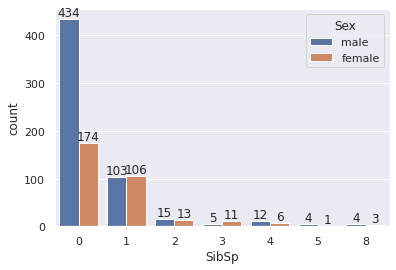

In [37]:
#Counts of instances with Siblings or Spouse
plt.Figure(figsize=(10,6),dpi=75)

ax=sns.countplot(data=df,x='SibSp',hue='Sex')
for i in ax.containers:
    ax.bar_label(i,)

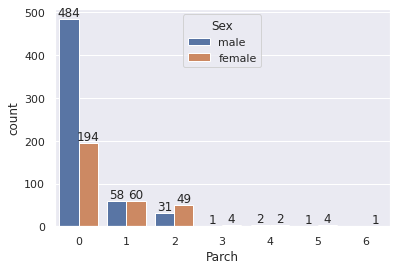

In [38]:
#Counts of instances with Parents or Childrens

plt.Figure(figsize=(10,6),dpi=75)

ax=sns.countplot(data=df,x='Parch',hue='Sex')
for i in ax.containers:
    ax.bar_label(i,)

[Text(0, 0, '25.5239'), Text(0, 0, '44.4798')]

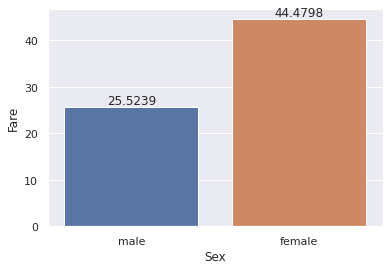

In [39]:
#Average fare

plt.Figure(figsize=(10,6),dpi=75)

ax=sns.barplot(data=df,x='Sex',y='Fare',ci=None)
ax.bar_label(ax.containers[0])

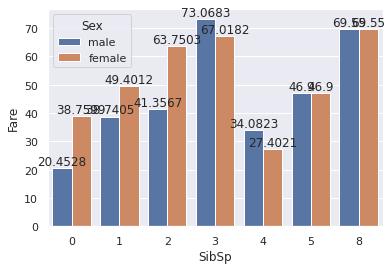

In [40]:
#Average fare with Siblings or Spouse

plt.Figure(figsize=(10,6),dpi=75)
ax=sns.barplot(data=df,x='SibSp',hue='Sex',y='Fare',ci=None)
for i in ax.containers:
    ax.bar_label(i,)

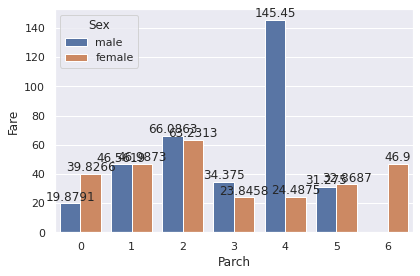

In [41]:
#Average fare with Parents or Children

plt.Figure(figsize=(10,10),dpi=75)
ax=sns.barplot(data=df,x='Parch',hue='Sex',y='Fare',ci=None)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.tight_layout()

<AxesSubplot:>

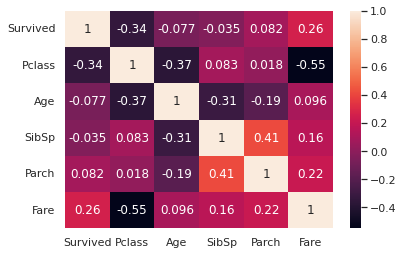

In [42]:
plt.Figure(figsize=(10,6),dpi=75)
sns.heatmap(df.corr(),annot=True)

In [43]:
#Lets fill missing values of age by categoriwise mean

In [44]:
df.groupby(['Survived', 'Pclass','Sex','SibSp','Parch','Embarked']).mean()

Age        Fare
Survived Pclass Sex    SibSp Parch Embarked                       
0        1      female 0     0     C         50.000000   28.712500
                       1     2     S         13.500000  151.550000
                male   0     0     C         45.400000   59.163047
                                   S         48.395833   34.024046
                             1     C         44.250000  100.144800
...                                                ...         ...
1        3      male   1     1     C         20.000000   15.411100
                                   S          5.333333   14.311100
                             2     S          1.000000   20.575000
                       2     0     Q               NaN   23.250000
                       4     2     S          3.000000   31.387500

[160 rows x 2 columns]

In [45]:
df['Age'] = df.groupby(['Survived', 'Pclass','Sex','SibSp','Parch','Embarked'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [46]:
df['Age'].isnull().sum()

23

In [47]:
df['Age'] = df.groupby(['Survived', 'Pclass','Sex','SibSp','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [48]:
df['Age'].isnull().sum()

10

In [49]:
df['Age'] = df.groupby(['Survived', 'Pclass','Sex','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [50]:
df['Age'].isnull().sum()

8

In [51]:
df['Age'] = df.groupby(['Survived', 'Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [52]:
df['Age'].isnull().sum()

0

In [53]:
#Lets redefine Numerical dataframe as we have missing values with respect to some categorical features

df_num=df.select_dtypes(exclude='object') #Numerical Dataframe

In [54]:
df_num['Age'].isnull().sum()

0

In [55]:
#Lets recheck Numerical Features details
feature_details.numerical_feature_details(df_num)


                   NUMERICAL FEATURE DETAILS                     


________________

Feature: Survived
________________

Minimum Survived is 0
Maximum Survived is 1
Average Survived is 0.38


NULLS:-

    0.0 % Null values 
    (i.e Out of 891 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 2 unique values

OUTLIERS:-

    25th Percentile is:  0.0
    75th Percentile is:  1.0
    Inter Quartile range is:  1.0
    Upper limit is:  2.5
    Lower limit is:  -1.5


    >>> HIGHER OUTLIERS: 0 
    >>> LOWER OUTLIERS: 0 





________________

Feature: Pclass
________________

Minimum Pclass is 1
Maximum Pclass is 3
Average Pclass is 2.31


NULLS:-

    0.0 % Null values 
    (i.e Out of 891 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 3 unique values

OUTLIERS:-

    25th Percentile is:  2.0
    75th Percentile is:  3.0
    Inter Quartile range is:  1.0
    Upper limit is:  4.5
    Lower limit is:  0.5


    >>> HIGHER OUTLIERS: 0 
    >>> LOWER OU

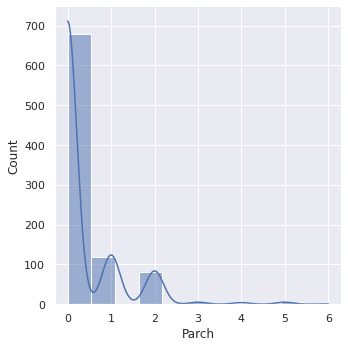

In [56]:
#Checking for Parch's outliers

sns.displot(df['Parch'],kde=True)

<AxesSubplot:xlabel='Parch'>

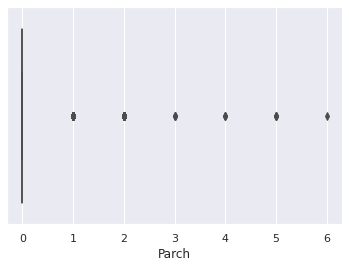

In [57]:
sns.boxplot(data=df,x='Parch')

In [58]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [59]:
118+80+5+5+4+1

213

In [60]:
# % instances with 0 Parents or Childs
np.round((df['Parch'].value_counts()[0]/len(df))*100,2)

76.09

###### Outliers details:

##### Age-
    - There are 13 instances above 63 years which is OK.
    
##### SibSp-
    - There are 46 instances with more than 3 Siblings or Spouses which is OK.
    
##### Parch-
    There are 213 instances with more than 1 Parents or Childrens as a outliers, which is OK. 
    
##### Fare-
    - There are 116 instances with fare more than 65 dollars which is OK.
    
    
#### Conclustion - No significant problem with outliers in numerical data

In [61]:
df_cat.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [62]:
#Lets remove the 'Name' and 'Ticket' columns as they are not going to contibute in prediction

df_cat=df_cat.drop(['Name','Ticket'],axis=1)

In [63]:
df_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [64]:
df_cat.isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [65]:
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [66]:
#Lets remove 'Survived' column as it is Target variable

In [67]:
df_num=df_num.drop('Survived',axis=1)

In [68]:
df_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [69]:
df_num.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [71]:
#Onehot Encoding

In [72]:
#Categorical Dataset with dummies
df_cat_dum=pd.get_dummies(df_cat,drop_first=True)

In [73]:
df_cat_dum.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [74]:
#Lets join this categorical dataframe with dummies with numerical data frame 
#to create final dataframe for our Machine Learning Model 

In [75]:
df_final=pd.concat([df_num,df_cat_dum],axis=1)

In [76]:
df_final.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [77]:
print(len(df),len(df_cat_dum),len(df_cat),len(df_num),len(df_final))

891 891 891 891 891


We are pretty much done with EDA and Feature Engineering, Now lets create Machine Learning Model.

## Logistic Regression Model

In [78]:
#Separating Dependent and Independent variables

X=df_final #Independent Variables
y=df['Survived'] #Dependent Variable


In [79]:
#Lets Split training ,evaluation and testing data

from sklearn.model_selection import train_test_split

# 80% of data is training data, setting aside other 20%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.20, random_state=101)

# Remaining 20% is split into evaluation and test sets
# Each is 10% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [80]:
#Lets scale data

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler()

In [83]:
X_train=scaler.fit_transform(X_train)

In [84]:
X_eval=scaler.transform(X_eval)

In [85]:
X_test=scaler.transform(X_test)

In [86]:
#Lets create base Model

from sklearn.linear_model import LogisticRegression

In [87]:
log_model=LogisticRegression(penalty='elasticnet',solver='saga',multi_class='ovr',max_iter=10000)

In [88]:
#Lets find best parameters with GradSearch Cross Validation
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid={'l1_ratio':np.linspace(0,1,20),'C':np.logspace(0,10,20)}

In [90]:
grid_model=GridSearchCV(estimator=log_model,param_grid=param_grid,cv=20)

In [91]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=20,
             estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])})

In [92]:
grid_model.best_estimator_

LogisticRegression(l1_ratio=0.3157894736842105, max_iter=10000,
                   multi_class='ovr', penalty='elasticnet', solver='saga')

In [93]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.3157894736842105}

In [94]:
grid_model.predict_proba(X_eval)

array([[0.79361066, 0.20638934],
       [0.36546193, 0.63453807],
       [0.04802046, 0.95197954],
       [0.82464985, 0.17535015],
       [0.9598698 , 0.0401302 ],
       [0.02809256, 0.97190744],
       [0.68372961, 0.31627039],
       [0.87804269, 0.12195731],
       [0.44051863, 0.55948137],
       [0.61635235, 0.38364765],
       [0.42334841, 0.57665159],
       [0.28150399, 0.71849601],
       [0.19836591, 0.80163409],
       [0.29155912, 0.70844088],
       [0.65261082, 0.34738918],
       [0.95149453, 0.04850547],
       [0.45804649, 0.54195351],
       [0.84932833, 0.15067167],
       [0.84650893, 0.15349107],
       [0.49499761, 0.50500239],
       [0.7498915 , 0.2501085 ],
       [0.9300961 , 0.0699039 ],
       [0.93696766, 0.06303234],
       [0.05329389, 0.94670611],
       [0.7924351 , 0.2075649 ],
       [0.17967806, 0.82032194],
       [0.04349786, 0.95650214],
       [0.4300913 , 0.5699087 ],
       [0.67088219, 0.32911781],
       [0.26924971, 0.73075029],
       [0.

In [95]:
y_pred=grid_model.predict(X_eval)

In [96]:
#Performance Metrics

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report

In [97]:
accuracy_score(y_eval,y_pred)

0.8314606741573034

In [98]:
precision_score(y_eval,y_pred)

0.8292682926829268

In [99]:
recall_score(y_eval,y_pred)

0.8095238095238095

In [100]:
confusion_matrix(y_eval,y_pred)

array([[40,  7],
       [ 8, 34]])

In [101]:
print(classification_report(y_eval,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        47
           1       0.83      0.81      0.82        42

    accuracy                           0.83        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.83      0.83      0.83        89



In [102]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

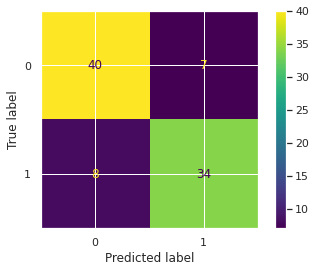

In [103]:
plot_confusion_matrix(grid_model,X_eval,y_eval)

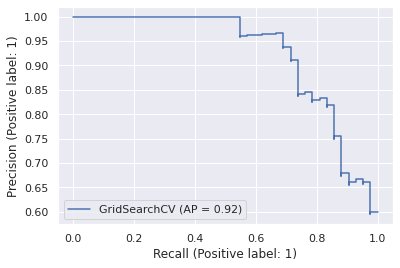

In [104]:
plot_precision_recall_curve(grid_model,X_eval,y_eval)

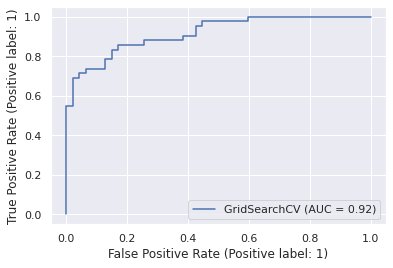

In [105]:
plot_roc_curve(grid_model,X_eval,y_eval)

In [106]:
y_pred_final=grid_model.predict(X_test)

In [107]:
grid_model.predict_proba(X_test)

array([[0.95230032, 0.04769968],
       [0.29155912, 0.70844088],
       [0.93389633, 0.06610367],
       [0.09487212, 0.90512788],
       [0.90975336, 0.09024664],
       [0.89464948, 0.10535052],
       [0.66160648, 0.33839352],
       [0.28711969, 0.71288031],
       [0.61416353, 0.38583647],
       [0.87933633, 0.12066367],
       [0.279469  , 0.720531  ],
       [0.71010621, 0.28989379],
       [0.62226214, 0.37773786],
       [0.42334841, 0.57665159],
       [0.53037357, 0.46962643],
       [0.32904673, 0.67095327],
       [0.29155912, 0.70844088],
       [0.87122697, 0.12877303],
       [0.89848399, 0.10151601],
       [0.42404436, 0.57595564],
       [0.10402302, 0.89597698],
       [0.89870209, 0.10129791],
       [0.18273069, 0.81726931],
       [0.14112429, 0.85887571],
       [0.3588454 , 0.6411546 ],
       [0.93298917, 0.06701083],
       [0.9028634 , 0.0971366 ],
       [0.7601465 , 0.2398535 ],
       [0.03873607, 0.96126393],
       [0.4541847 , 0.5458153 ],
       [0.

In [108]:
accuracy_score(y_test,y_pred_final)

0.8

In [109]:
precision_score(y_test,y_pred_final)

0.8333333333333334

In [110]:
recall_score(y_test,y_pred_final)

0.6578947368421053

In [111]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.83      0.66      0.74        38

    accuracy                           0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.80      0.80      0.80        90



In [112]:
confusion_matrix(y_test,y_pred_final)

array([[47,  5],
       [13, 25]])

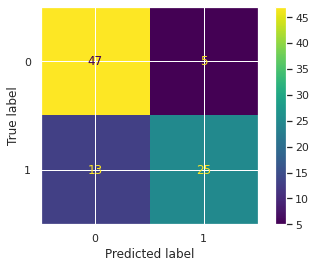

In [113]:
plot_confusion_matrix(grid_model,X_test,y_test)

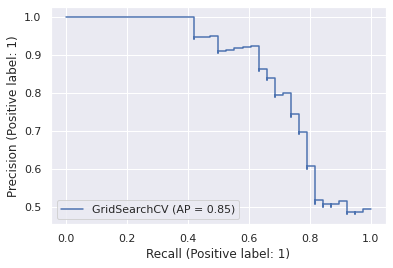

In [114]:
plot_precision_recall_curve(grid_model,X_test,y_test)

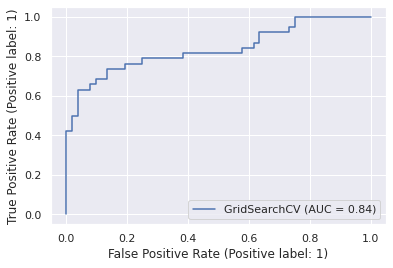

In [115]:
plot_roc_curve(grid_model,X_test,y_test)